### 網路爬蟲並分析
+ 資料來源：https://www.ptt.cc/bbs/index.html

### 若無法正常顯示該頁時
+ 請將該頁 github 網址複製貼至 https://nbviewer.jupyter.org/ 輸入框上

### 欲處理與分析的方向
+ 爬取 HatePolitics 版上熱門的文章，進而分析是否與標題有相關聯

### 資料的取得
+ 透過 requests 模擬瀏覽器發送請求，進而取得回傳的 html
+ 請求有兩種：Get、Post，依據各網頁而有所不同
+ 使用 beautifulSoup 過濾文章：篩選推文大於 50 且為正常的文章
+ 使用 pandas 將爬取下來的資料作整理與進一步的操作(甚至能輸出 csv)

In [1]:
import requests as reqs
import pandas as pd
import numpy as np
import pyprind
import urllib3

from bs4 import BeautifulSoup

# 關閉不安全的請求警示文字
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# 儲存 loc 之 index 變數
dfsIndex = 0

# 預計抓多少篇文章
maxCatch = 300

# 要爬的網頁網址
url = 'https://www.ptt.cc/bbs/HatePolitics/index' # 'https://www.ptt.cc/bbs/sex/index'
url_suffix = '.html'

# post 預載資訊
preload = {
    "from": "/bbs/HatePolitics/index.html",
    "yes": "yes"
}

# 自訂要抓取 ptt 的 html index 範圍 
pageIndexStart = 3700
pageIndexEnd = 4058

# 設定讀取 Bar
pbar = pyprind.ProgBar(pageIndexEnd - pageIndexStart)

tempRes = reqs.session()
response = tempRes.post('https://www.ptt.cc/ask/over18', verify=False, data=preload)

# 自定義存放爬蟲資料的格式
dfs = pd.DataFrame(np.random.randn(10, 4), columns=['推文數', '發文日期', '作者', '標題'])

# 抓 pageIndexStart ~ pageIndexEnd 的頁數中推文超過 maxCatch 個的文章
for i in range(pageIndexStart, pageIndexEnd):
    response = tempRes.get(url + str(i) + url_suffix, verify=False)
    soup = BeautifulSoup(response.text, "lxml")
    
    # 提前結束爬蟲
    if dfsIndex > maxCatch:
        print('提前結束')
        break
    
    # 抓取符合的文章結構
    for entry in soup.select('.r-ent'):
        # 作者字串長度至少大於 3 且 (推文為爆 或 推文數須為數字且推文數超過 50)
        if ((len(entry.select('.author')[0].text) > 3) and 
            (entry.select('.nrec')[0].text == '爆' or 
             (entry.select('.nrec')[0].text.isdigit() and int(entry.select('.nrec')[0].text) >= 50))):
#             print('將資料存入dfs[%s]=%s' % (dfsIndex, 'https://www.ptt.cc' + entry.select('.title a')[0]['href']))
            dfs.loc[dfsIndex] = [entry.select('.nrec')[0].text, entry.select('.date')[0].text, entry.select('.author')[0].text, entry.select('.title')[0].text.strip('\n,').replace('　',' ')]
            dfsIndex += 1
    pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:09


### 顯示剛爬完整理至 pandas 的 dataFrame 資料
+ 顯示前五筆資料：dfs.head()
+ 顯示末五筆資料：dfs.tail()
+ 顯示全部資料：dfs

In [2]:
dfs

,推文數,發文日期,作者,標題
0,爆,1/10,TigerLily,Re: [新聞] 職業網軍造就韓流 韓國瑜：批判我的更多
1,爆,1/10,mark2165,[新聞] 被指控是韓國瑜PTT網軍！當事人親自回應
2,爆,1/10,sxxs,[討論] 李佳芬行程還原
3,63,1/10,mark2165,[新聞] 高雄燈會將重現「韓國瑜夜市」 攤販搶抽
4,99,1/10,rgef594,Fw: [新聞] 白冰冰拍《來去高雄》擅用齊柏林遺作 阿
5,64,1/11,zkow,[新聞] 不改校歌！立院凍結陸官預算案
6,58,1/11,znck,[Live] 韓國瑜行程滿檔 中油董座戴謙拜會後記者
7,99,1/11,omanorboyo,[新聞] 擅用齊柏林遺作 潘恆旭道歉了
8,98,1/11,ToyotaPrius,Fw: [新聞] 先別管冰冰了！台南超質感觀光影片 網：
9,77,1/11,mark2165,[Live] 大政治大爆卦-高雄開講


### 將取得的資料進一步分析
+ 使用 jieba 套件將標題執行斷字與停用字的過濾後，找出頻繁出現的字詞
+ 利用這些熱門的文章來檢視標題是否有代表著關鍵性的字詞

In [14]:
import jieba
import logging

from collections import Counter

terms = []

# 關閉 DEBUG 警示文字
jieba.setLogLevel(logging.INFO)

# 中文的斷字，如果是使用繁體文字，請記得去下載繁體字典來使用 ref https://github.com/ldkrsi/jieba-zh_TW
jieba.set_dictionary('jieba\dict.txt')
jieba.add_word('韓國瑜')

# 中文的停用字 ref https://github.com/GoatWang/ithome_ironman/blob/master/day16_NLP_Chinese/stops.txt
with open('jieba\stopWords.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n')
    
# 將爬到的資料做斷字並判斷是否為停用字後將關鍵字詞 append 至 terms 變數
for i in range(len(dfs)):
    tempList = [t for t in jieba.cut(dfs.iloc[:, 3].values[i]) if t not in stops]
    for temp in tempList:
        terms.append(temp)

### 分析結果的呈現
+ 將出現的字詞做統計並排序顯示
+ 使用文字雲呈現關鍵性字詞
+ 使用直方圖呈現關鍵性字詞與次數

In [15]:
# 排序
sortTerms = sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)
sortTerms

[('討論', 79),
 ('新聞', 67),
 ('韓國瑜', 53),
 ('Live', 44),
 ('柯文哲', 38),
 ('Re', 34),
 ('高雄', 18),
 ('柯', 12),
 ('黑特', 11),
 ('關鍵', 10),
 ('時刻', 10),
 ('FB', 10),
 ('民進黨', 9),
 ('嗆', 8),
 ('柯P', 8),
 ('Fw', 7),
 ('市長', 7),
 ('吳董', 7),
 ('台灣', 7),
 ('專訪', 7),
 ('柯粉', 7),
 ('後', 6),
 ('風向', 6),
 ('館長', 6),
 ('現在', 6),
 ('年代', 6),
 ('錢', 6),
 ('爆卦', 5),
 ('政黑', 5),
 ('口譯', 5),
 ('哥', 5),
 ('選', 5),
 ('最', 5),
 ('拚', 5),
 ('議會', 5),
 ('淪陷', 5),
 ('請', 5),
 ('醒醒', 5),
 ('腦', 5),
 ('拜託', 5),
 ('公開', 5),
 ('逐字', 5),
 ('稿', 5),
 ('觀光', 4),
 ('臉書', 4),
 ('夜宿', 4),
 ('韓', 4),
 ('遭', 4),
 ('陳思宇', 4),
 ('民調', 4),
 ('鄉民', 4),
 ('轉錄', 4),
 ('2020', 4),
 ('氣爆', 4),
 ('龍介', 4),
 ('段宜康', 4),
 ('曲棍球', 4),
 ('完整', 4),
 ('禮貌', 4),
 ('真的', 4),
 ('190123', 4),
 ('PTT', 3),
 ('道歉', 3),
 ('政治', 3),
 ('事件', 3),
 ('韓粉', 3),
 ('政府', 3),
 ('做', 3),
 ('愛河', 3),
 ('中國', 3),
 ('陳其邁', 3),
 ('龍捲風', 3),
 ('備詢', 3),
 ('酸', 3),
 ('成', 3),
 ('台視', 3),
 ('爆料', 3),
 ('支持', 3),
 ('蔡', 3),
 ('暐', 3),
 ('瀚', 3),
 ('團向', 3),
 ('KKC

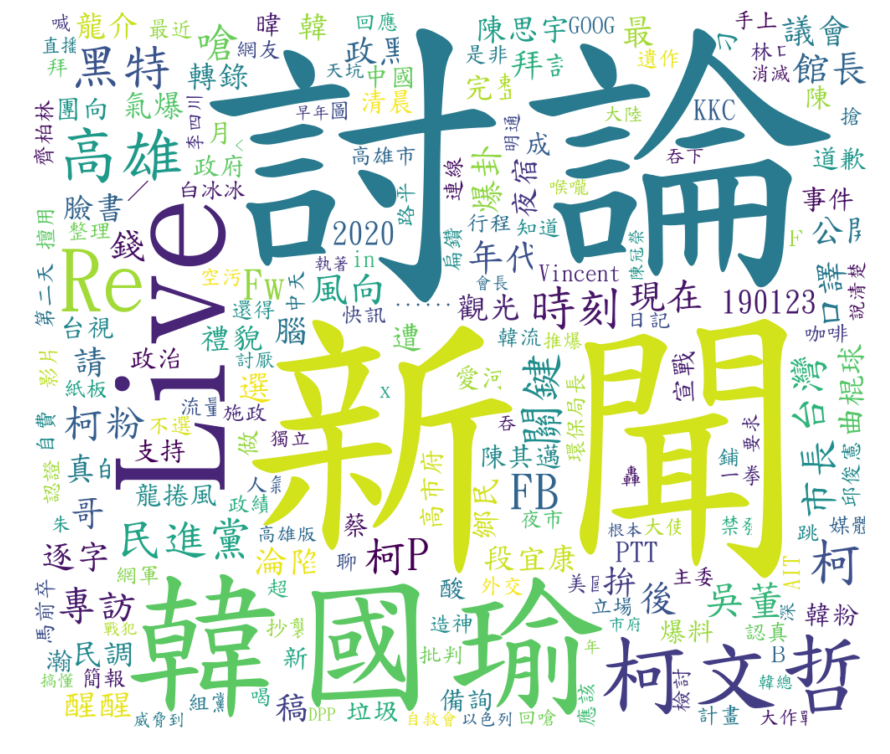

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 若處理中文時務必指定字形檔
wordcloud = WordCloud(background_color="white", width=1000, height=860, margin=2, font_path="c:\windows\fonts\kaiu.ttf")
wordcloud.generate_from_frequencies(frequencies=Counter(terms))  

# 畫文字雲圖顯示
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

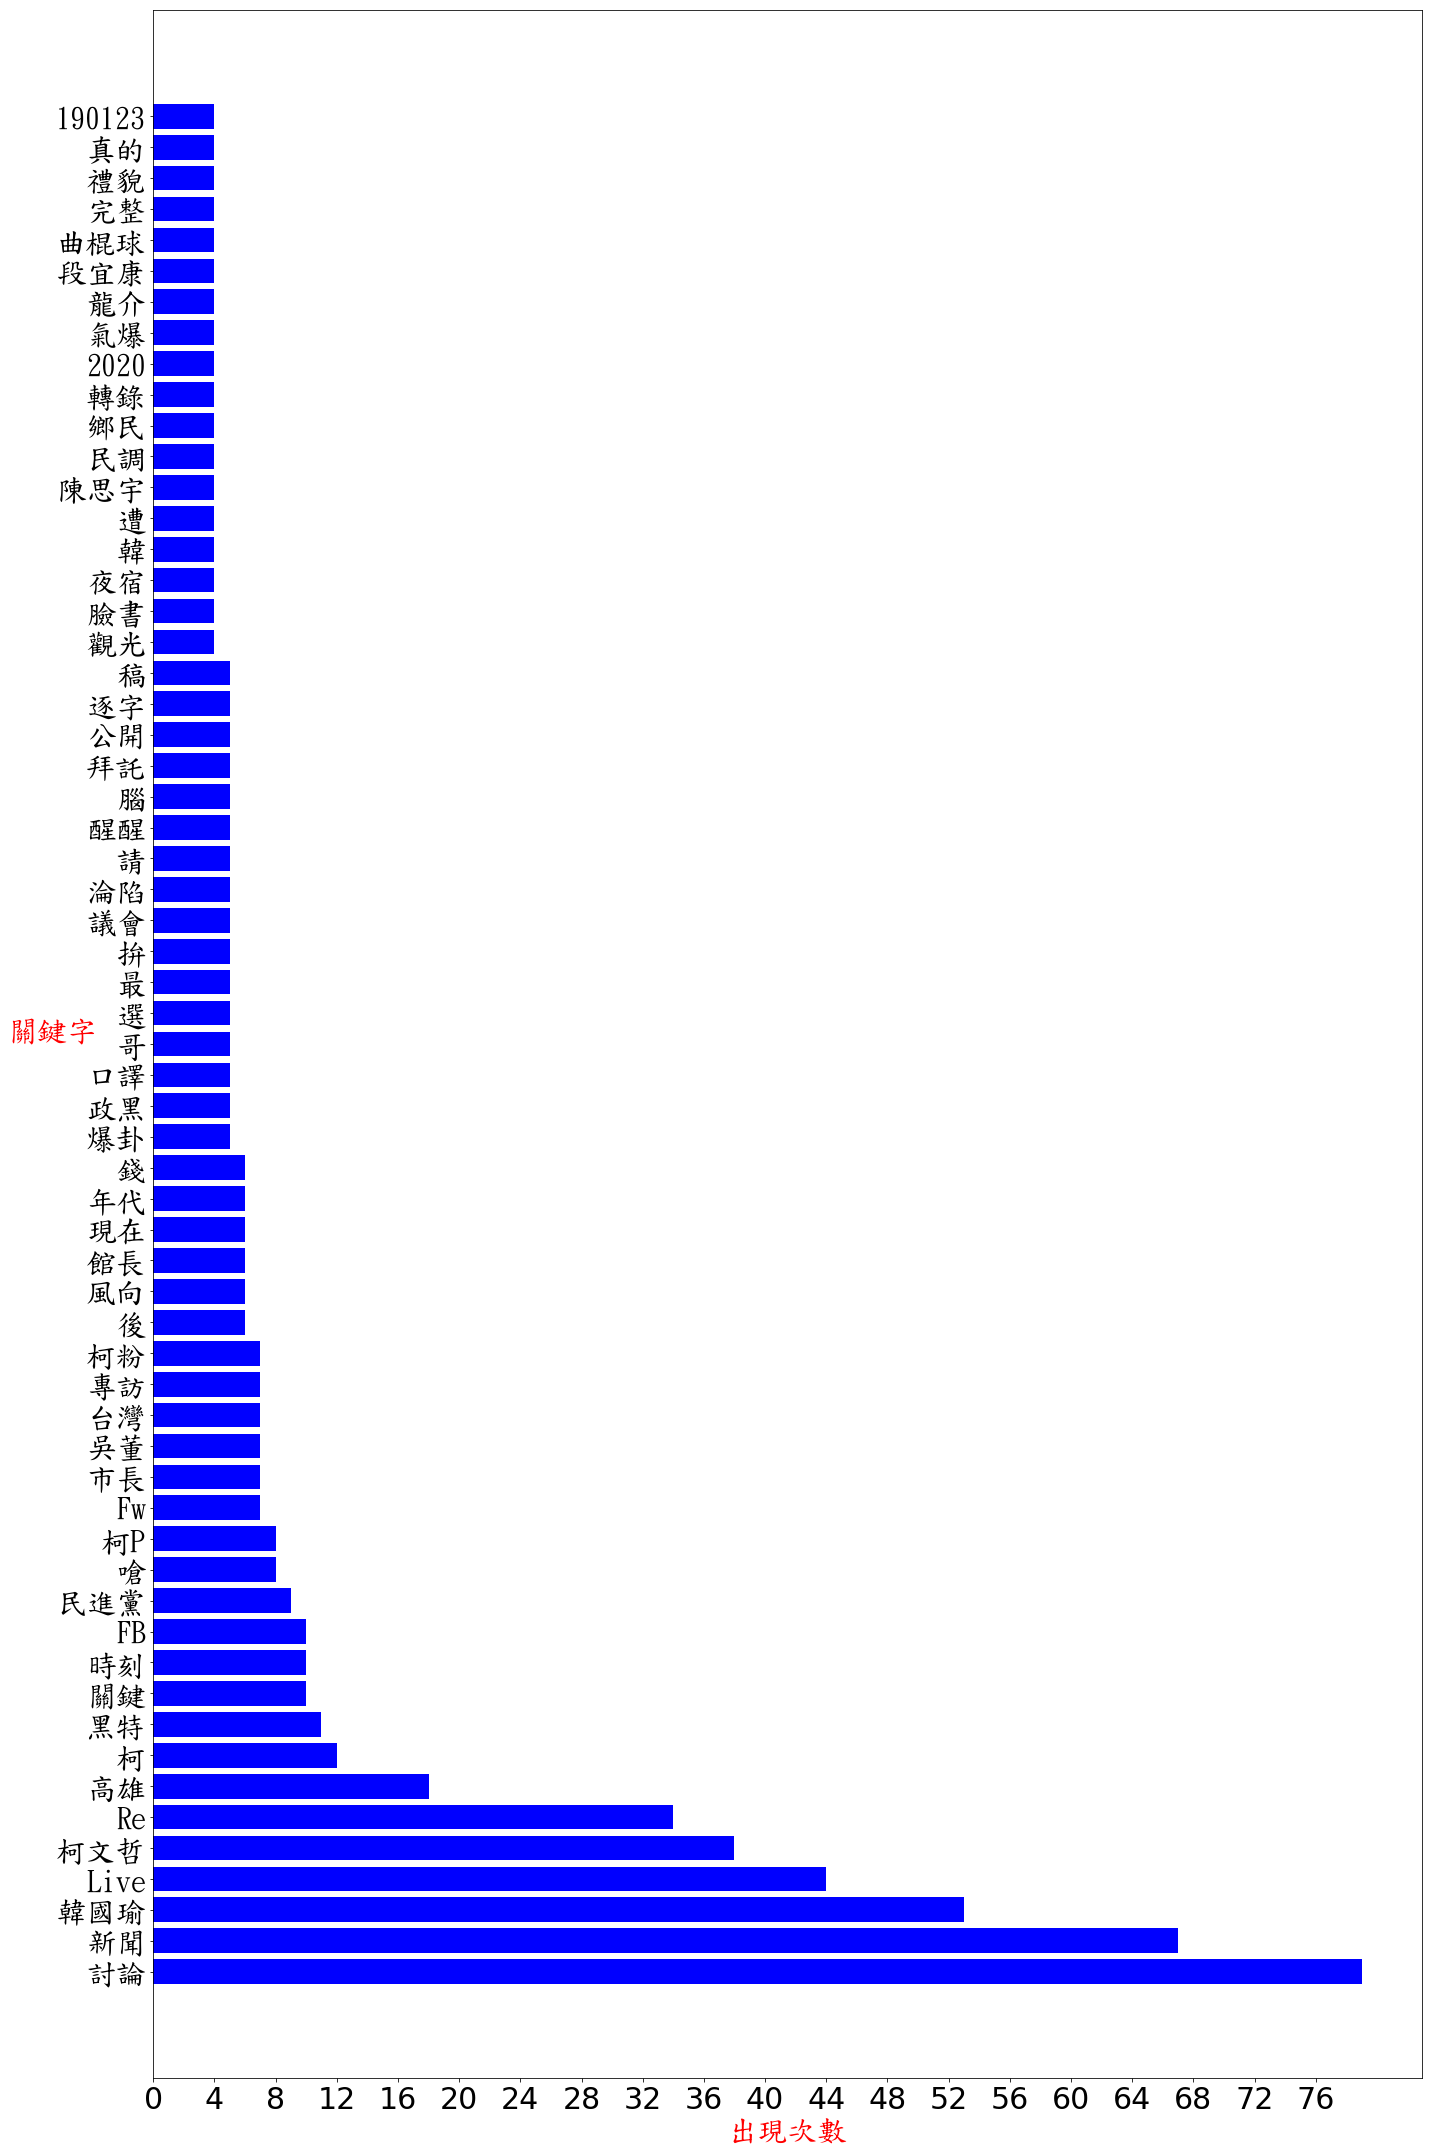

In [20]:
x = []
y = []
for i in range(len(sortTerms)):
    # 過濾次數太低的關鍵字
    if sortTerms[i][1] >= 4:
        x.append(sortTerms[i][0])
        y.append(sortTerms[i][1])
        
# FontProperties() 設置的是 Windows 系统本身的標楷體
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=18)

# 畫直方圖
plt.figure(figsize=(20, 30))
plt.barh(x, y, color='blue')
plt.xticks(np.arange(0, y[0], 4), fontsize=30)
plt.yticks(fontproperties=font, fontsize=30)
plt.xlabel('出現次數', fontproperties=font, fontsize=30, color='red')
plt.ylabel('關鍵字', fontproperties=font, fontsize=30, rotation=0, color='red')
plt.tight_layout()
plt.show()